# Importing all the necessary libary

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import sklearn.linear_model
import pandas as pd 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import seaborn as sns

# Import the training and the test data into numpy or pandas.

In [2]:
df=pd.read_csv('housing.csv')

df

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
0           322.0       126.0         8.3252            452600.0   
1          2401.0      1138.0         8.3014            358500.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity  
0            NEAR BAY  
1            NEAR BAY  
2            NEAR BAY  
3            NEAR BAY  
4            NEAR BAY  
...               ...  
20635          INLAND  
20636          INLAND  
20637          INLAND  
20638          INLAND  
20639          INLAND  

[20640 rows x 10 columns]

# checking shape of the dataframe provided to display the number of rows and columns

In [3]:
df.shape

(20640, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
df.isnull()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0          False     False               False        False           False   
1          False     False               False        False           False   
2          False     False               False        False           False   
3          False     False               False        False           False   
4          False     False               False        False           False   
...          ...       ...                 ...          ...             ...   
20635      False     False               False        False           False   
20636      False     False               False        False           False   
20637      False     False               False        False           False   
20638      False     False               False        False           False   
20639      False     False               False        False           False   

       population  households  median_income  median_house_value  \
0           False       False          False               False   
1           False       False          False               False   
2           False       False          False               False   
3           False       False          False               False   
4           False       False          False               False   
...           ...         ...            ...                 ...   
20635       False       False          False               False   
20636       False       False          False               False   
20637       False       False          False               False   
20638       False       False          False               False   
20639       False       False          False               False   

       ocean_proximity  
0                False  
1                False  
2                False  
3                False  
4                False  
...                ...  
20635            False  
20636            False  
20637            False  
20638            False  
20639            False  

[20640 rows x 10 columns]

In [6]:
df.isnull().sum() 

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

# Replacing the object now as we cannot work with object datatype to find the mean median for the null values

In [7]:
df.replace(to_replace=['INLAND'],value=0,inplace=True)

In [8]:
df.replace(to_replace=['NEAR BAY'],value=1,inplace=True)

In [9]:
df.replace(to_replace=['<1H OCEAN'],value=2,inplace=True)

In [10]:
df.replace(to_replace=['ISLAND'],value=3,inplace=True)

In [11]:
df.replace(to_replace=['NEAR OCEAN'],value=4,inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  int64  
dtypes: float64(9), int64(1)
memory usage: 1.6 MB


In [13]:
df

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
0           322.0       126.0         8.3252            452600.0   
1          2401.0      1138.0         8.3014            358500.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

       ocean_proximity  
0                    1  
1                    1  
2                    1  
3                    1  
4                    1  
...                ...  
20635                0  
20636                0  
20637                0  
20638                0  
20639                0  

[20640 rows x 10 columns]

In [14]:
mean=df.mean()
mean

longitude               -119.569704
latitude                  35.631861
housing_median_age        28.639486
total_rooms             2635.763081
total_bedrooms           537.870553
population              1425.476744
households               499.539680
median_income              3.870671
median_house_value    206855.816909
ocean_proximity            1.512064
dtype: float64

In [15]:
df.fillna(df.mean(),inplace=True)
df

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
0           322.0       126.0         8.3252            452600.0   
1          2401.0      1138.0         8.3014            358500.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

       ocean_proximity  
0                    1  
1                    1  
2                    1  
3                    1  
4                    1  
...                ...  
20635                0  
20636                0  
20637                0  
20638                0  
20639                0  

[20640 rows x 10 columns]

In [16]:
df

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
0           322.0       126.0         8.3252            452600.0   
1          2401.0      1138.0         8.3014            358500.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

       ocean_proximity  
0                    1  
1                    1  
2                    1  
3                    1  
4                    1  
...                ...  
20635                0  
20636                0  
20637                0  
20638                0  
20639                0  

[20640 rows x 10 columns]

In [17]:
df.isnull().sum() 

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

# Defining x and y for the split 

## extracting last column as target features(dependent feature)

In [18]:
y=df["median_house_value"] # extracting last column as target features(dependent feature)
y   

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20640, dtype: float64

In [19]:
np.unique(y)

array([ 14999.,  17500.,  22500., ..., 499100., 500000., 500001.])

In [20]:
df["median_house_value"].value_counts

<bound method IndexOpsMixin.value_counts of 0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20640, dtype: float64>

In [21]:
df.shape

(20640, 10)

# Defining x for the test and train split

In [22]:
x=df.drop("median_house_value",axis=1) 

x

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  ocean_proximity  
0           322.0       126.0         8.3252                1  
1          2401.0      1138.0         8.3014                1  
2           496.0       177.0         7.2574                1  
3           558.0       219.0         5.6431                1  
4           565.0       259.0         3.8462                1  
...           ...         ...            ...              ...  
20635       845.0       330.0         1.5603                0  
20636       356.0       114.0         2.5568                0  
20637      1007.0       433.0         1.7000                0  
20638       741.0       349.0         1.8672                0  
20639      1387.0       530.0         2.3886                0  

[20640 rows x 9 columns]

In [23]:
x.shape,y.shape

((20640, 9), (20640,))

# Spliting the data into 70/30 

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.30,
                                                     random_state=42)

In [25]:
x_train.shape,x_test.shape

((14448, 9), (6192, 9))

In [26]:
y_train.shape,y_test.shape


((14448,), (6192,))

# Now we start with EDA 

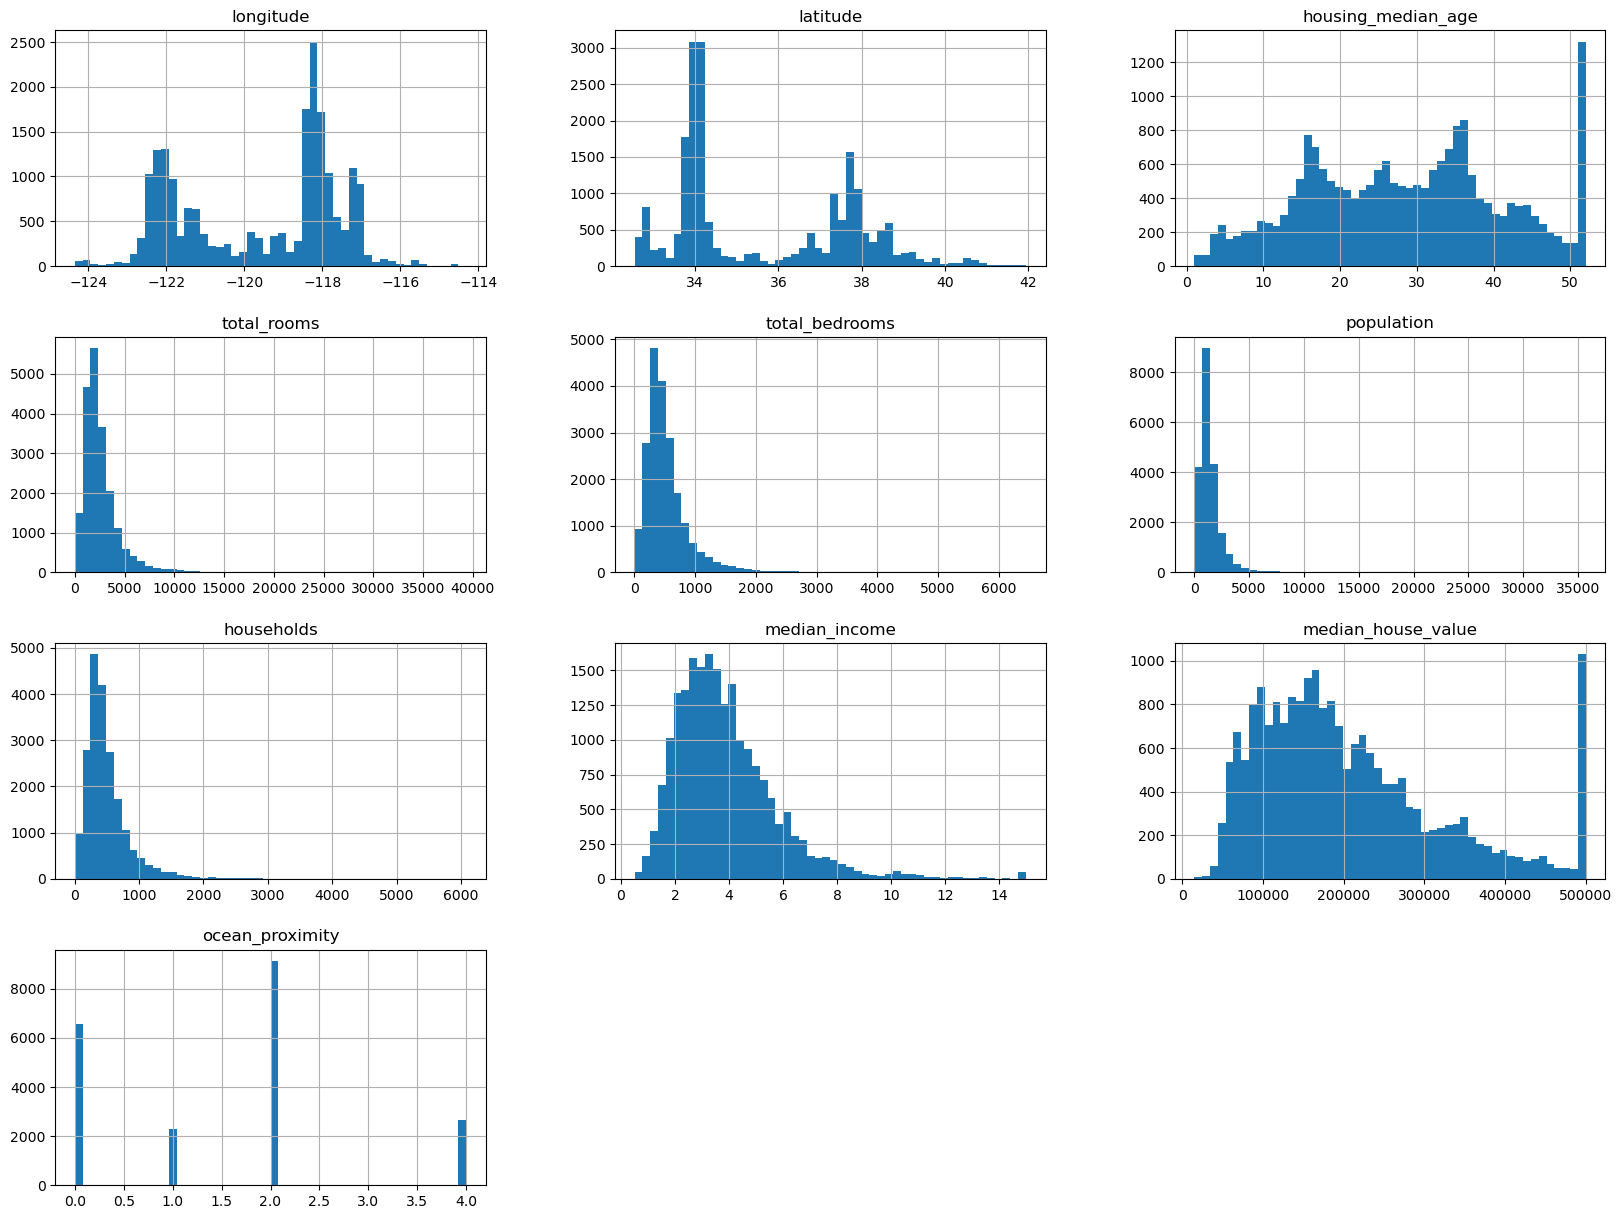

In [27]:
df.hist(bins=50, figsize=(20,15)) #trying to fit dataset in bin (20640%50=412 data in one bar)
plt.show()

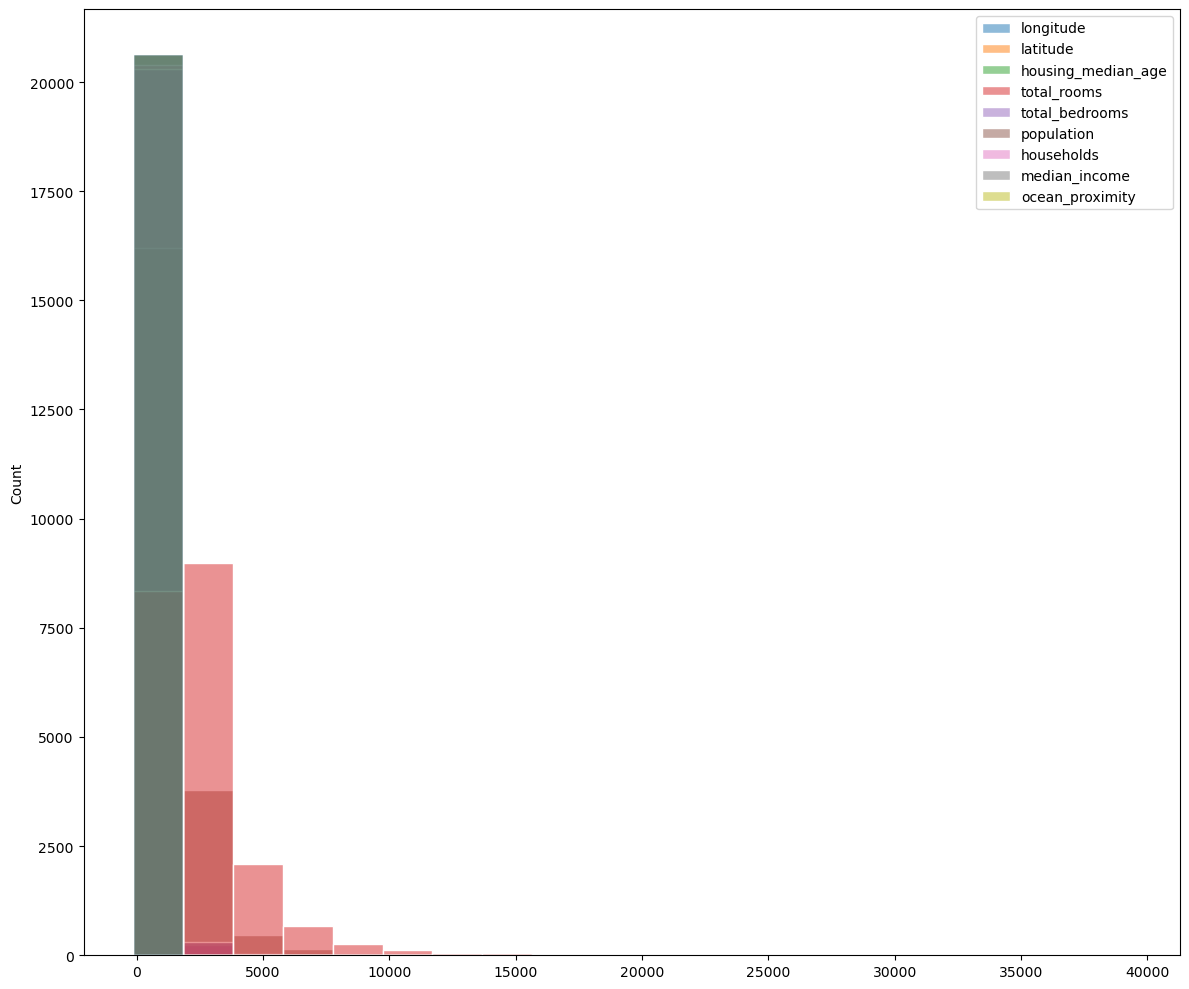

In [28]:
# Selected the columns for which I want to plot the histograms
selected_columns = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'ocean_proximity']

# Plotted the histograms for the selected columns
plt.figure(figsize=(12, 10))
sns.histplot(data=df[selected_columns], bins=20, edgecolor="white")
plt.tight_layout()
plt.show()

In [29]:
#removing outlier (noise in data)
import scipy.stats as stats
import numpy as np
z_scores = np.abs(stats.zscore(df))
threshold =3
print("size before removing outliers:",df.shape)
outliers_df = df[(z_scores > threshold).any(axis=1)]
df=df[(z_scores <= threshold).all(axis=1)]
print("size before removing outliers:",df.shape)

size before removing outliers: (20640, 10)
size before removing outliers: (19746, 10)


In [30]:
# Scale our data using StandardScaler:
standardscaler = StandardScaler()
x= standardscaler.fit_transform(x)
#x BECAUSE it is our training dataset
x

array([[-1.32783522,  1.05254828,  0.98214266, ..., -0.97703285,
         2.34476576, -0.39770231],
       [-1.32284391,  1.04318455, -0.60701891, ...,  1.66996103,
         2.33223796, -0.39770231],
       [-1.33282653,  1.03850269,  1.85618152, ..., -0.84363692,
         1.7826994 , -0.39770231],
       ...,
       [-0.8237132 ,  1.77823747, -0.92485123, ..., -0.17404163,
        -1.14259331, -1.17436762],
       [-0.87362627,  1.77823747, -0.84539315, ..., -0.39375258,
        -1.05458292, -1.17436762],
       [-0.83369581,  1.75014627, -1.00430931, ...,  0.07967221,
        -0.78012947, -1.17436762]])

In [31]:
correlation=df.corr()["median_house_value"]
correlation

longitude            -0.046107
latitude             -0.146238
housing_median_age    0.117536
total_rooms           0.171421
total_bedrooms        0.075431
population           -0.034106
households            0.095357
median_income         0.657108
median_house_value    1.000000
ocean_proximity       0.385103
Name: median_house_value, dtype: float64

In [32]:
sorted_features=correlation.abs().sort_values(ascending=False)
sorted_features.head(10)

median_house_value    1.000000
median_income         0.657108
ocean_proximity       0.385103
total_rooms           0.171421
latitude              0.146238
housing_median_age    0.117536
households            0.095357
total_bedrooms        0.075431
longitude             0.046107
population            0.034106
Name: median_house_value, dtype: float64

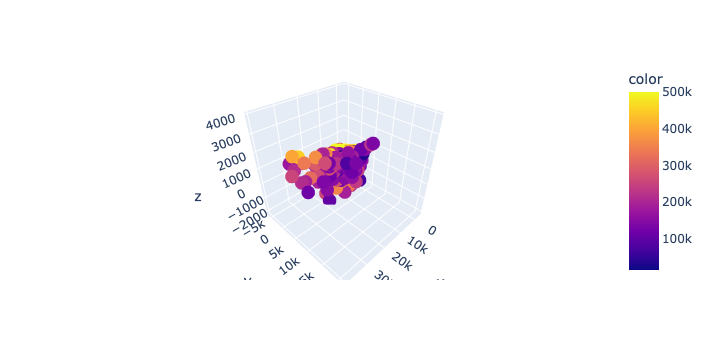

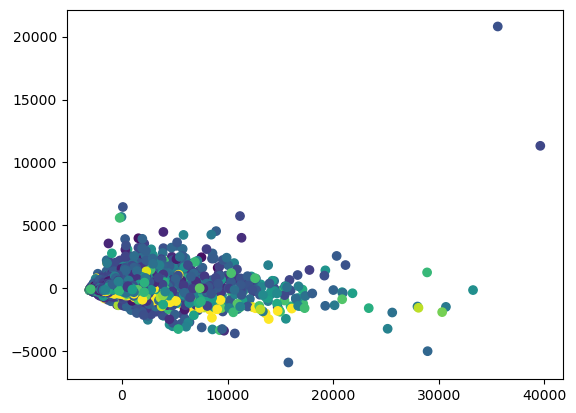

In [33]:
from sklearn.decomposition import PCA
#build 2 dimentional projection
projector = PCA(n_components=3, whiten=False)

#build projection in train data
projection=projector.fit_transform(x_train)

projection.shape

plt.scatter(projection[:,0],projection[:,1],c=y_train)

#3dimention projection
import matplotlib.pyplot as plt
import plotly.express as px
fig=px.scatter_3d(x=projection[:,0],y=projection[:,1],z=projection[:,2],color=y_train)
fig.show()

<Axes: >

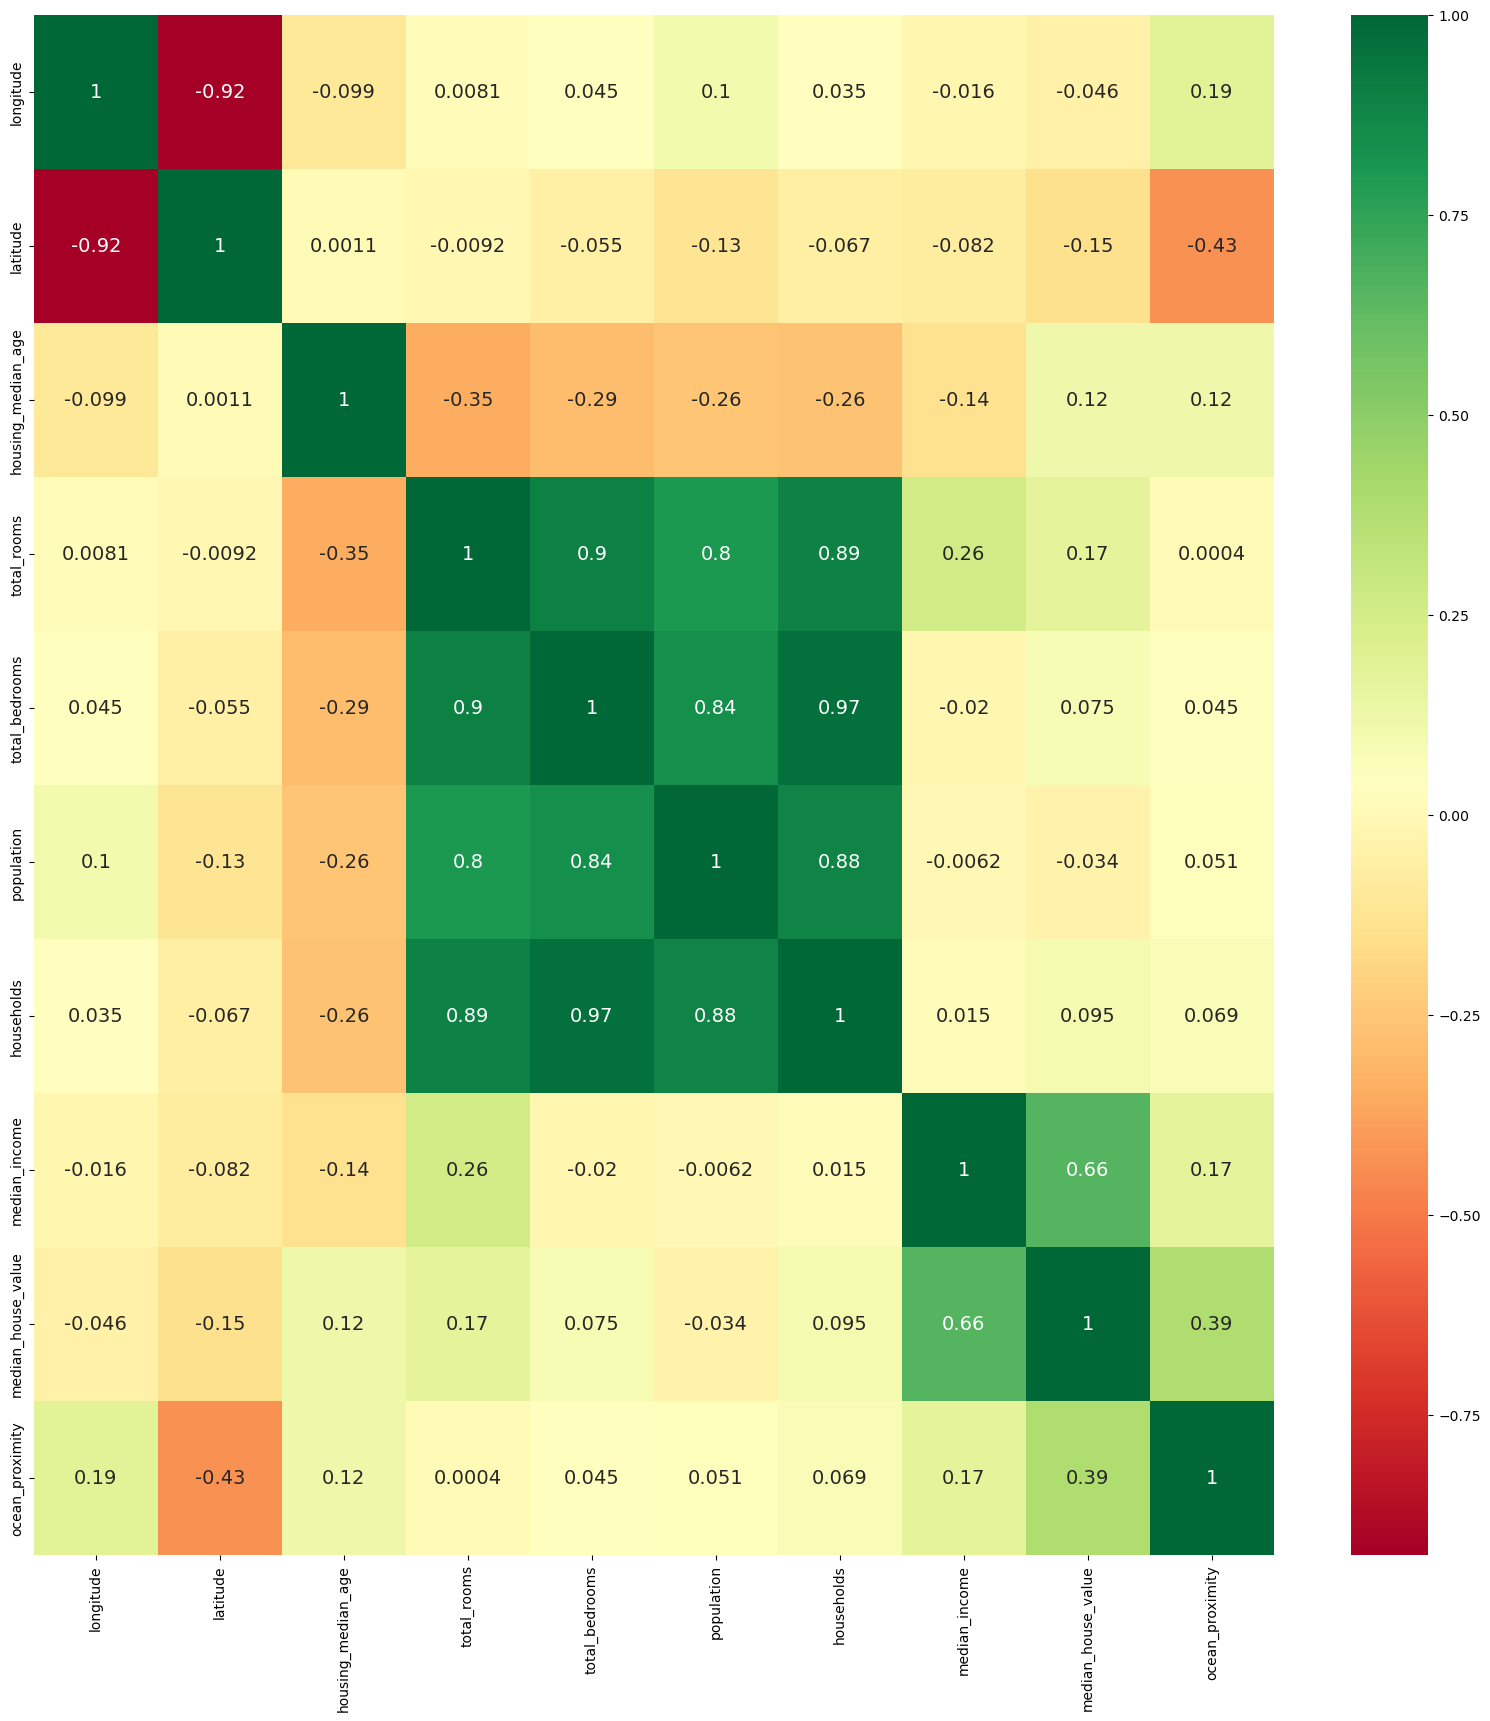

In [53]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,cmap="RdYlGn", annot_kws={"size":14})

In [43]:
plt.show()

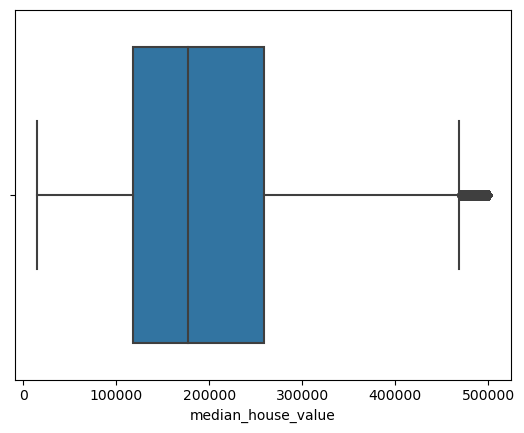

In [36]:
sns.boxplot(x=df['median_house_value'])

plt.show()

In [39]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [40]:
# Train the model
model.fit(x_train, y_train)

# Evaluate the model
r2_score = model.score(x_train, y_train)

In [41]:
r2_score

0.6418711100830379